In [7]:
import sys, os
sys.path.append(os.path.abspath(".."))

import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import pandas as pd
from typing import Optional, Dict

from dim_est.analysis.h5_to_dataframe_plotting_helpers import load_mi_summary
from plotting_functions import plot_from_df_agg_errorbar_mean_stderr

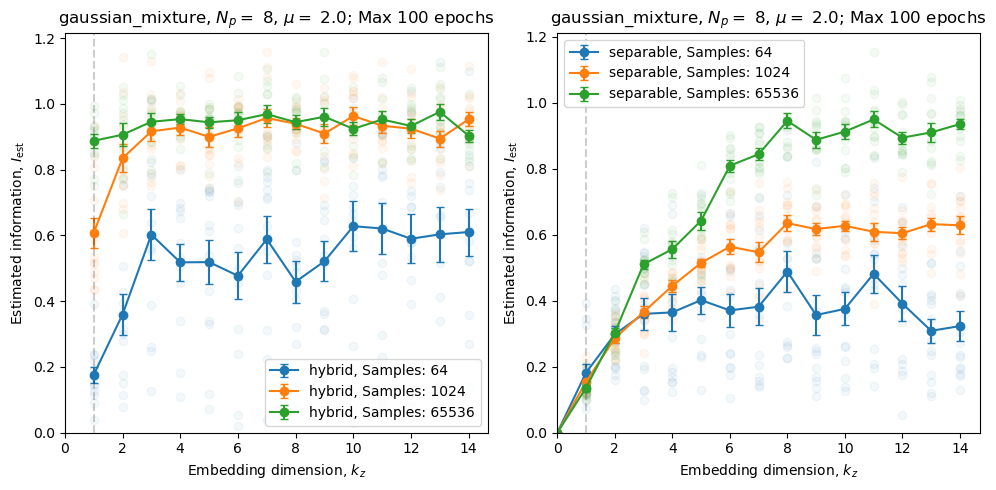

In [9]:
outfile = "../h5_results/finite_data_gaussian_mixture.h5"
dataset_type = 'gaussian_mixture'
fig, axes = plt.subplots(1, 2, figsize=(10,5))
mi_bits_peak = 2.0

n_peaks = 8
mu =2.0
n_epoch = 100

for ii, critic_type in enumerate(["hybrid", "separable"]):
    ax = axes[ii]
        
    sweep_tags = {
        "params.experiment_cfg.training.cfg.n_samples": [64, 1024, 65536], #[64, 256, 1024, 4096, 8192, 65536],
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": [critic_type],
    }
    
    
    extra_filters = {
        "params.experiment_cfg.dataset.cfg.latent.n_peaks": n_peaks,
        "params.experiment_cfg.dataset.cfg.latent.mu": mu,
        "params.experiment_cfg.dataset.cfg.latent.mi_bits_peak": mi_bits_peak,
        "params.experiment_cfg.training.cfg.n_epoch": n_epoch,
        # "tags.n_iter": n_iter,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        setup = "finite_data_epoch",
        metric_keys=("mi_bits_test", "mi_bits_train"),
        include_meta_keys=[
            "tags.kz",        
        ]
    )
    
    title = rf"{dataset_type}, $N_p =$ {n_peaks}, $\mu =$ {mu}; Max {n_epoch} epochs"
    
    
    def label_fn(group_vals):
            critic_type, n_samples = group_vals ## group_vals is always a tuple (read with the comma)
            return rf"{critic_type}, Samples: {n_samples}"
    
    plot_from_df_agg_errorbar_mean_stderr(
        ax,
        results_df,
        group_keys=["critic_type", "experiment_cfg.training.cfg.n_samples"],
        x_key="kz",
        y_key="info_est",
        # yerr_key="std_smoothed_info",
        label_fn=label_fn,
        title=title,
        true_dim=1
    )
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
        
plt.tight_layout()
plt.show()

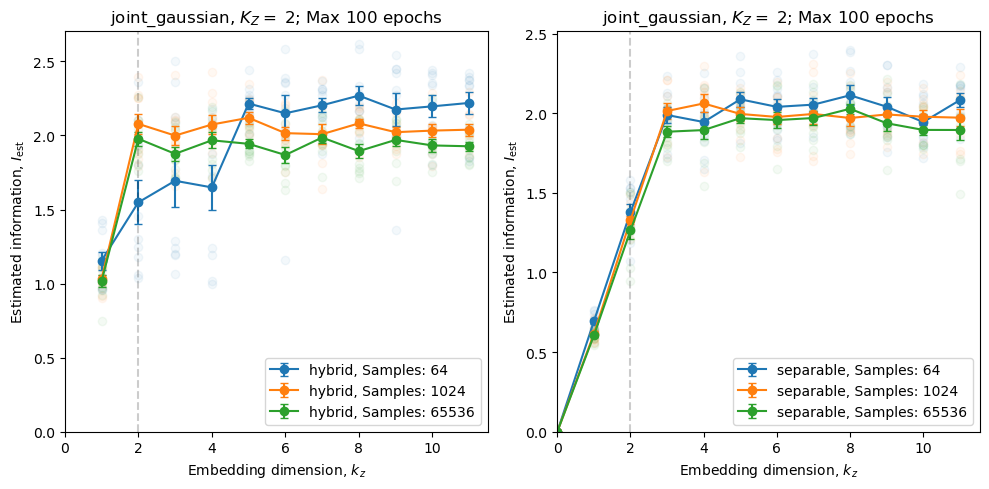

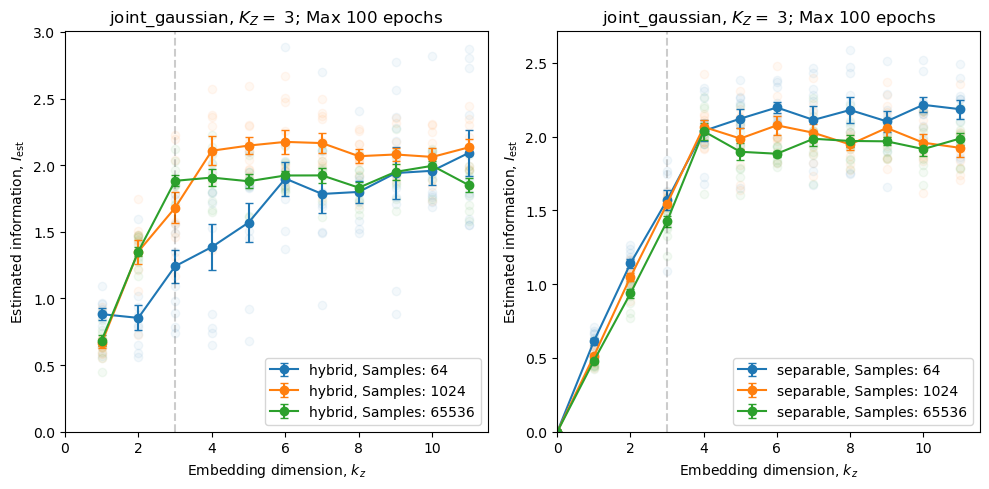

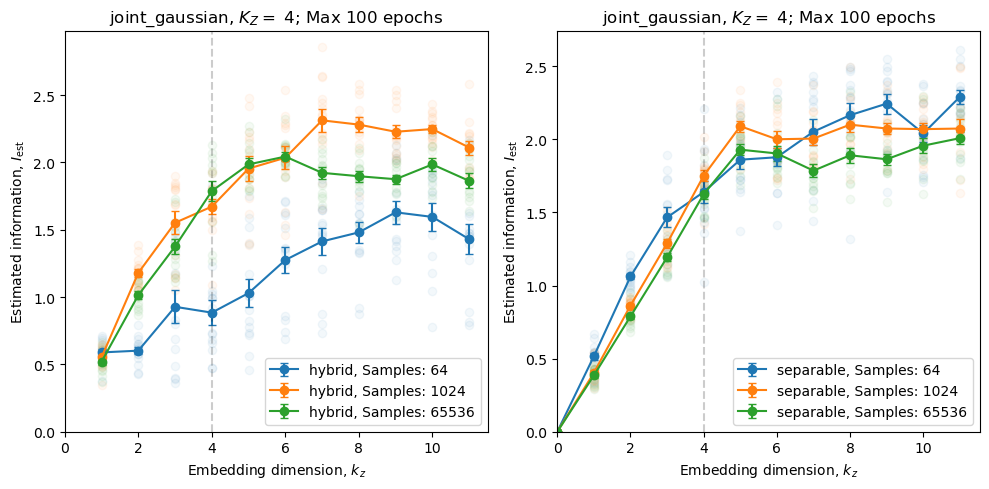

In [11]:
outfile = "../h5_results/finite_data_joint_gaussian.h5"
dataset_type = 'joint_gaussian'

mi_bits = 2.0
for latent_dim in [2, 3, 4]:
    n_epoch = 100
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    
    for ii, critic_type in enumerate(["hybrid", "separable"]):
        ax = axes[ii]
        
        
        sweep_tags = {
            "params.experiment_cfg.training.cfg.n_samples": [64, 1024, 65536], #[64, 256, 1024, 4096, 8192, 65536],
            "tags.dataset_type": [dataset_type],
            "tags.critic_type": [critic_type],
        }
        
        extra_filters = {
            "params.experiment_cfg.dataset.cfg.latent.latent_dim": latent_dim,
            "params.experiment_cfg.dataset.cfg.latent.mi_bits": mi_bits,
            "params.experiment_cfg.training.cfg.n_epoch": n_epoch,
            # # "tags.n_iter": n_iter,
        }
        
        results_df = load_mi_summary(
            outfile=outfile,
            sweep_tags=sweep_tags,
            extra_filters=extra_filters,
            setup = "finite_data_epoch",
            metric_keys=("mi_bits_test", "mi_bits_train"),
            include_meta_keys=[
                "tags.kz",       
            ]
        )
        
        title = rf"{dataset_type}, $K_Z =$ {latent_dim}; Max {n_epoch} epochs"
        
        
        def label_fn(group_vals):
                critic_type, n_samples = group_vals ## group_vals is always a tuple (read with the comma)
                return rf"{critic_type}, Samples: {n_samples}"
        
        plot_from_df_agg_errorbar_mean_stderr(
            ax,
            results_df,
            group_keys=["critic_type", "experiment_cfg.training.cfg.n_samples"],
            x_key="kz",
            y_key="info_est",
            # yerr_key="std_smoothed_info",
            label_fn=label_fn,
            title=title,
            true_dim=latent_dim
        )
    
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=0)
            
    plt.tight_layout()
    plt.show()

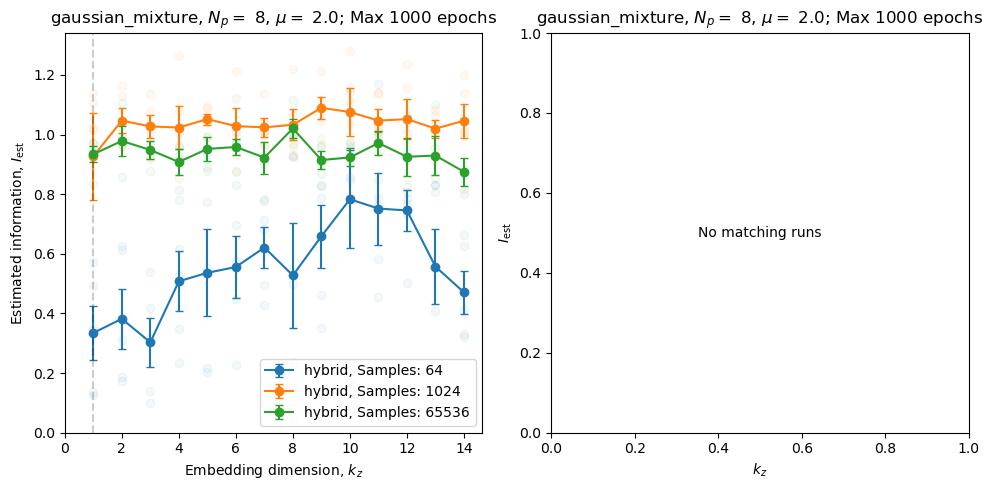

In [12]:
outfile = "../h5_results/finite_data_gaussian_mixture.h5"
dataset_type = 'gaussian_mixture'
fig, axes = plt.subplots(1, 2, figsize=(10,5))
mi_bits_peak = 2.0

n_peaks = 8
mu =2.0
n_epoch = 1000


for ii, critic_type in enumerate(["hybrid", "separable"]):
    ax = axes[ii]
        
    sweep_tags = {
        "params.experiment_cfg.training.cfg.n_samples": [64, 1024, 65536], #[64, 256, 1024, 4096, 8192, 65536],
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": [critic_type],
    }
    
    extra_filters = {
        "params.experiment_cfg.dataset.cfg.latent.n_peaks": n_peaks,
        "params.experiment_cfg.dataset.cfg.latent.mu": mu,
        "params.experiment_cfg.dataset.cfg.latent.mi_bits_peak": mi_bits_peak,
        "params.experiment_cfg.training.cfg.n_epoch": n_epoch,
        # "tags.n_iter": n_iter,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        setup = "finite_data_epoch",
        metric_keys=("mi_bits_test", "mi_bits_train"),
        include_meta_keys=[
            "tags.kz",        
        ]
    )
    
    title = rf"{dataset_type}, $N_p =$ {n_peaks}, $\mu =$ {mu}; Max {n_epoch} epochs"
    
    
    def label_fn(group_vals):
            critic_type, n_samples = group_vals ## group_vals is always a tuple (read with the comma)
            return rf"{critic_type}, Samples: {n_samples}"
    
    plot_from_df_agg_errorbar_mean_stderr(
        ax,
        results_df,
        group_keys=["critic_type", "experiment_cfg.training.cfg.n_samples"],
        x_key="kz",
        y_key="info_est",
        # yerr_key="std_smoothed_info",
        label_fn=label_fn,
        title=title,
        true_dim=1
    )
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
        
plt.tight_layout()
plt.show()

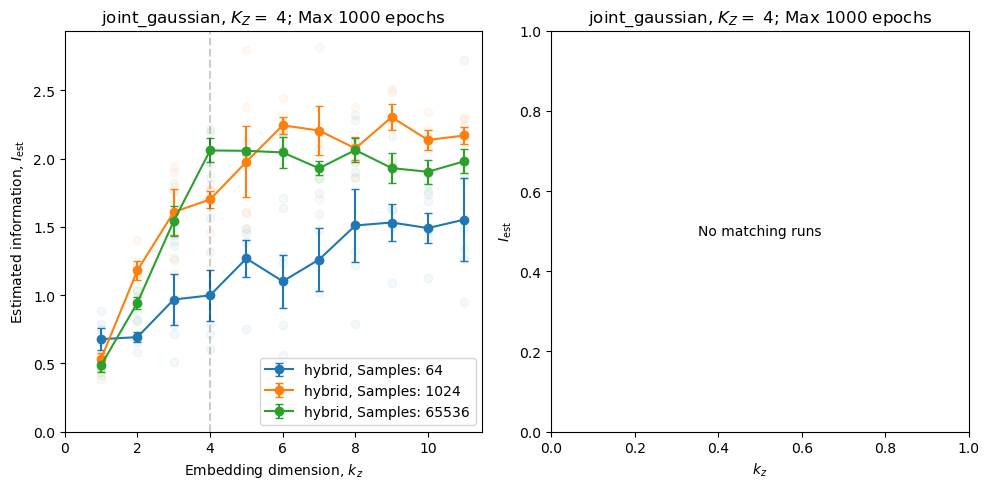

In [13]:
outfile = "../h5_results/finite_data_joint_gaussian.h5"
dataset_type = 'joint_gaussian'
fig, axes = plt.subplots(1, 2, figsize=(10,5))

mi_bits = 2.0
latent_dim = 4
n_epoch = 1000


for ii, critic_type in enumerate(["hybrid", "separable"]):
    ax = axes[ii]
        
    sweep_tags = {
        "params.experiment_cfg.training.cfg.n_samples": [64, 1024, 65536], #[64, 256, 1024, 4096, 8192, 65536],
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": [critic_type],
    }
    
    extra_filters = {
        "params.experiment_cfg.dataset.cfg.latent.latent_dim": latent_dim,
        "params.experiment_cfg.dataset.cfg.latent.mi_bits": mi_bits,
        "params.experiment_cfg.training.cfg.n_epoch": n_epoch,
        # # "tags.n_iter": n_iter,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        setup = "finite_data_epoch",
        metric_keys=("mi_bits_test", "mi_bits_train"),
        include_meta_keys=[
            "tags.kz",        
        ]
    )
    
    title = rf"{dataset_type}, $K_Z =$ {latent_dim}; Max {n_epoch} epochs"
    
    
    def label_fn(group_vals):
            critic_type, n_samples = group_vals ## group_vals is always a tuple (read with the comma)
            return rf"{critic_type}, Samples: {n_samples}"
    
    plot_from_df_agg_errorbar_mean_stderr(
        ax,
        results_df,
        group_keys=["critic_type", "experiment_cfg.training.cfg.n_samples"],
        x_key="kz",
        y_key="info_est",
        # yerr_key="std_smoothed_info",
        label_fn=label_fn,
        title=title,
        true_dim=latent_dim
    )
    
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
        
        
plt.tight_layout()
plt.show()

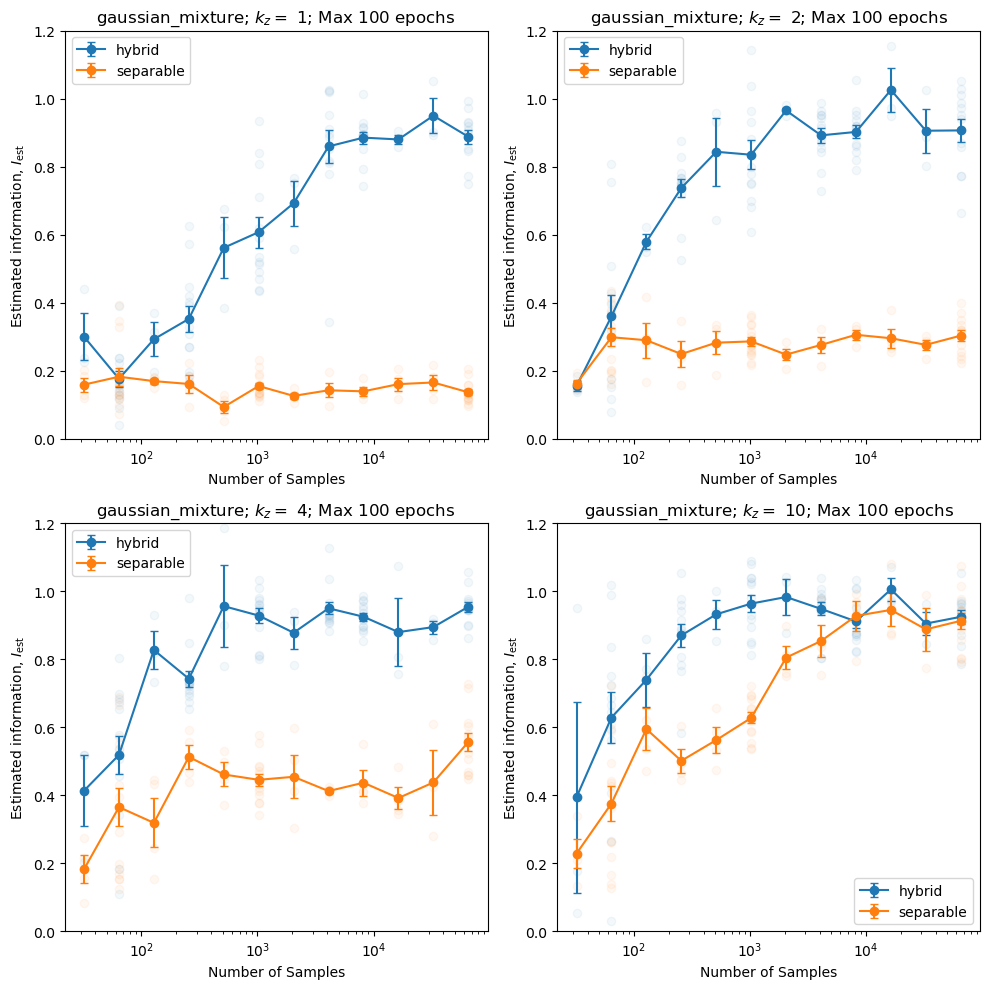

In [16]:
outfile = "../h5_results/finite_data_gaussian_mixture.h5"
dataset_type = 'gaussian_mixture'
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes= axes.flatten()
mi_bits_peak = 2.0

n_peaks = 8
mu =2.0
n_epoch = 100

for ii, kz, in enumerate([1,2, 4, 10]):
    ax = axes[ii]
    
    sweep_tags = {
        "params.experiment_cfg.training.cfg.n_samples": [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536],  #[64, 256, 1024, 4096, 8192, 65536]
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": ["hybrid", "separable"],
        "tags.kz": [kz],        
    
    }
    
    
    extra_filters = {
        "params.experiment_cfg.dataset.cfg.latent.n_peaks": n_peaks,
        "params.experiment_cfg.dataset.cfg.latent.mu": mu,
        "params.experiment_cfg.dataset.cfg.latent.mi_bits_peak": mi_bits_peak,
        "params.experiment_cfg.training.cfg.n_epoch": n_epoch,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        setup = "finite_data_epoch",
        metric_keys=("mi_bits_test", "mi_bits_train"),
        include_meta_keys=[
            "tags.kz",        
        ]
    )
    
    # title = rf"{dataset_type}, $N_p =$ {n_peaks}, $\mu =$ {mu}; Max {n_epoch} epochs"
    title = rf"{dataset_type}; $k_z = $ {kz}; Max {n_epoch} epochs"
    
    
    def label_fn(group_vals):
            critic_type,  = group_vals ## group_vals is always a tuple (read with the comma)
            return rf"{critic_type}"
    
    plot_from_df_agg_errorbar_mean_stderr(
        ax,
        results_df,
        group_keys=["critic_type"],
        x_key="experiment_cfg.training.cfg.n_samples",
        y_key="info_est",
        label_fn=label_fn,
        title=title,
        true_dim=None, 
        x_label = "Number of Samples"
        
    )
    ax.set_ylim([0, 1.2])
    ax.set_xscale('log')
        
plt.tight_layout()
plt.show()

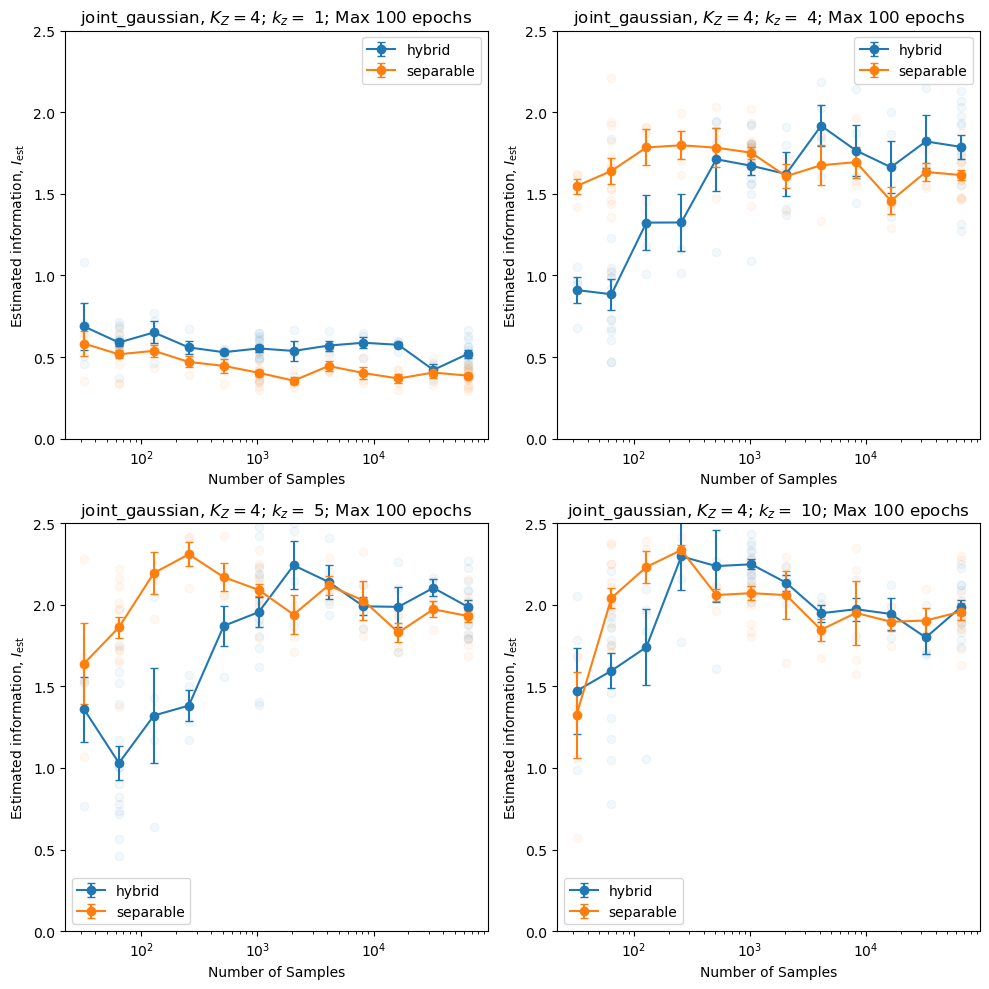

In [15]:
outfile = "../h5_results/finite_data_joint_gaussian.h5"
dataset_type = 'joint_gaussian'
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()
mi_bits_peak = 2.0

mi_bits = 2.0
latent_dim = 4
n_epoch = 100

for ii, kz, in enumerate([1,4, 5, 10]):
    ax = axes[ii]
    
    sweep_tags = {
        "params.experiment_cfg.training.cfg.n_samples": [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536],
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": ["hybrid", "separable"],
        "tags.kz": [kz],        
    
    }    
    
    extra_filters = {
        "params.experiment_cfg.dataset.cfg.latent.latent_dim": latent_dim,
        "params.experiment_cfg.dataset.cfg.latent.mi_bits": mi_bits,
        "params.experiment_cfg.training.cfg.n_epoch": n_epoch,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        setup = "finite_data_epoch",
        metric_keys=("mi_bits_test", "mi_bits_train"),
        include_meta_keys=[
            "tags.kz",        
        ]
    )
    
    title = rf"{dataset_type}, $K_Z = {latent_dim}$; $k_z = $ {kz}; Max {n_epoch} epochs"
    
    
    def label_fn(group_vals):
            critic_type,  = group_vals ## group_vals is always a tuple (read with the comma)
            return rf"{critic_type}"
    
    plot_from_df_agg_errorbar_mean_stderr(
        ax,
        results_df,
        group_keys=["critic_type"],
        x_key="experiment_cfg.training.cfg.n_samples",
        y_key="info_est",
        label_fn=label_fn,
        title=title,
        true_dim=None, 
        x_label = "Number of Samples"
        
    )
    ax.set_ylim([0, 2.5])
    ax.set_xscale('log')
        
plt.tight_layout()
plt.show()